In [102]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from astropy.table import Table
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget


In [103]:
SSPP = 'ssppOut-dr9.fits'
fits_file = fits.open(SSPP)
tbl = Table.read(SSPP, format='fits')

In [104]:
fits_file[1].columns

ColDefs(
    name = 'SPECOBJID'; format = '22A'
    name = 'PLATEID'; format = '19A'
    name = 'BESTOBJID'; format = '19A'
    name = 'FLUXOBJID'; format = '19A'
    name = 'TARGETOBJID'; format = '22A'
    name = 'SPECPRIMARY'; format = 'J'
    name = 'SPECLEGACY'; format = 'J'
    name = 'SPECSEGUE'; format = 'J'
    name = 'SPECSEGUE1'; format = 'J'
    name = 'SPECSEGUE2'; format = 'J'
    name = 'PLUG_RA'; format = 'D'
    name = 'PLUG_DEC'; format = 'D'
    name = 'LEGACY_TARGET1'; format = 'J'
    name = 'LEGACY_TARGET2'; format = 'J'
    name = 'SPECIAL_TARGET1'; format = 'K'
    name = 'SPECIAL_TARGET2'; format = 'K'
    name = 'FIRSTRELEASE'; format = '3A'
    name = 'PROGRAMNAME'; format = '23A'
    name = 'CHUNK'; format = '16A'
    name = 'PLATERUN'; format = '16A'
    name = 'RUNSSPP'; format = '3A'
    name = 'RUN1D'; format = 'A'
    name = 'RUN2D'; format = '3A'
    name = 'MJD'; format = 'J'
    name = 'PLATE'; format = 'I'
    name = 'FIBER'; format = 'I'
    name =

In [105]:
tbl
#SNR - signal to noise
#EBV - extinction in B - V (magnitude units)


SPECOBJID,PLATEID,BESTOBJID,FLUXOBJID,TARGETOBJID,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,PLUG_RA,PLUG_DEC,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,FIRSTRELEASE,PROGRAMNAME,CHUNK,PLATERUN,RUNSSPP,RUN1D,RUN2D,MJD,PLATE,FIBER,PRIM_TARGET,SPECTYPE_HAMMER,SPECTYPE_SUBCLASS,FLAG,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,TEFF_HA24,TEFF_HD24,TEFF_TK,TEFF_TG,TEFF_TI,TEFF_NGS1,TEFF_ANNSR,TEFF_ANNRR,TEFF_WBG,TEFF_K24,TEFF_KI13,TEFF_HA24_IND,TEFF_HD24_IND,TEFF_TK_IND,TEFF_TG_IND,TEFF_TI_IND,TEFF_NGS1_IND,TEFF_ANNSR_IND,TEFF_ANNRR_IND,TEFF_WBG_IND,TEFF_K24_IND,TEFF_KI13_IND,TEFF_HA24_UNC,TEFF_HD24_UNC,TEFF_TK_UNC,TEFF_TG_UNC,TEFF_TI_UNC,TEFF_NGS1_UNC,TEFF_ANNSR_UNC,TEFF_ANNRR_UNC,TEFF_WBG_UNC,TEFF_K24_UNC,TEFF_KI13_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,LOGG_NGS2,LOGG_NGS1,LOGG_ANNSR,LOGG_ANNRR,LOGG_CAI1,LOGG_CAI2,LOGG_MGH,LOGG_WBG,LOGG_K24,LOGG_KI13,LOGG_NGS2_IND,LOGG_NGS1_IND,LOGG_ANNSR_IND,LOGG_ANNRR_IND,LOGG_CAI1_IND,LOGG_CAI2_IND,LOGG_MGH_IND,LOGG_WBG_IND,LOGG_K24_IND,LOGG_KI13_IND,LOGG_NGS2_UNC,LOGG_NGS1_UNC,LOGG_ANNSR_UNC,LOGG_ANNRR_UNC,LOGG_CAI1_UNC,LOGG_CAI2_UNC,LOGG_MGH_UNC,LOGG_WBG_UNC,LOGG_K24_UNC,LOGG_KI13_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,FEH_NGS2,FEH_NGS1,FEH_ANNSR,FEH_ANNRR,FEH_CAIIK1,FEH_CAIIK2,FEH_CAIIK3,FEH_ACF,FEH_CAIIT,FEH_WBG,FEH_K24,FEH_KI13,FEH_NGS2_IND,FEH_NGS1_IND,FEH_ANNSR_IND,FEH_ANNRR_IND,FEH_CAIIK1_IND,FEH_CAIIK2_IND,FEH_CAIIK3_IND,FEH_ACF_IND,FEH_CAIIT_IND,FEH_WBG_IND,FEH_K24_IND,FEH_KI13_IND,FEH_NGS2_UNC,FEH_NGS1_UNC,FEH_ANNSR_UNC,FEH_ANNRR_UNC,FEH_CAIIK1_UNC,FEH_CAIIK2_UNC,FEH_CAIIK3_UNC,FEH_ACF_UNC,FEH_CAIIT_UNC,FEH_WBG_UNC,FEH_K24_UNC,FEH_KI13_UNC,AFE,AFE_IND,AFE_UNC,DIST_DWARF,DIST_TO,DIST_GIANT,DIST_AGB,DIST_FHB,DIST_AP,DIST_Z,RV_FLAG,RV_ADOP,RV_ADOP_UNC,RV_CAL,RV_CAL_UNC,RV_BS,RV_BS_UNC,RV_ELODIE,RV_ELODIE_UNC,RV_GSR,RV_GSR_UNC,V_MAG,BV,BV_BALMER,GR_PREDICT,GR_HA24,GR_HD24,GR_HP,G_MAG,UG,GR,RI,IZ,U_MAG_UNC,G_MAG_UNC,R_MAG_UNC,I_MAG_UNC,Z_MAG_UNC,EBV,SNR,QA,CC_CAHK,CC_MGH,RA,DEC,L,B,TEFF_SPEC,TEFF_SPEC_N,TEFF_SPEC_UNC,LOGG_SPEC,LOGG_SPEC_N,LOGG_SPEC_UNC,FEH_SPEC,FEH_SPEC_N,FEH_SPEC_UNC,TEFF_COL,TEFF_COL_UNC,FEH_TFIX_NGS2,FEH_TFIX_NGS1,LOGG_TFIX_NGS2,LOGG_TFIX_NGS1,FEH_TFIX_NGS2_UNC,FEH_TFIX_NGS1_UNC,LOGG_TFIX_NGS2_UNC,LOGG_TFIX_NGS1_UNC,FEH_TFIX_CAIIK1,FEH_TFIX_CAIIK1_UNC,ACF1,ACF1_SNR,ACF2,ACF2_SNR,INSPECT,ELODIERVFINAL,ELODIERVFINALERR,ZWARNING,SURVEY,PRIMTARGET,SECTARGET,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,L_CLASS,DIST_ADOP,MP_FLAG,TEFF_IRFM,TEFF_IRFM_IND,TEFF_IRFM_UNC,LOGG_NGS1_IRFM,LOGG_NGS1_IRFM_IND,LOGG_NGS1_IRFM_UNC,FEH_NGS1_IRFM,FEH_NGS1_IRFM_IND,FEH_NGS1_IRFM_UNC,LOGG_CAI1_IRFM,LOGG_CAI1_IRFM_IND,LOGG_CAI1_IRFM_UNC,FEH_CAIIK1_IRFM,FEH_CAIIK1_IRFM_IND,FEH_CAIIK1_IRFM_UNC
bytes22,bytes19,bytes19,bytes19,bytes22,int32,int32,int32,int32,int32,float64,float64,int32,int32,int64,int64,bytes3,bytes23,bytes16,bytes16,bytes3,bytes1,bytes3,int32,int16,int16,bytes13,bytes4,bytes20,bytes5,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

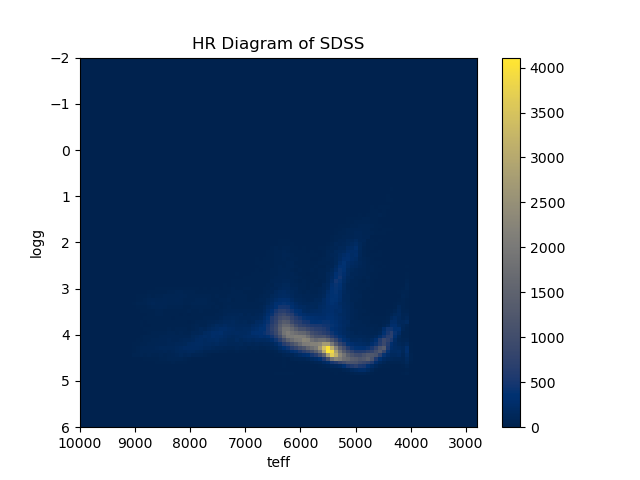

In [106]:
# Set the agg.path.chunksize to a higher value
#plt.rcParams['agg.path.chunksize'] = 10000000  # You can adjust this number as needed

# Plot your data
plt.figure()
plt.hist2d(tbl['TEFF_ADOP'], tbl['LOGG_ADOP'],range = [[2800,10000],[-2,6]],bins=100,cmap='cividis')
plt.colorbar()
plt.xlabel('teff')
plt.ylabel('logg')
plt.xlim(2800,10000)
plt.ylim(-2,6)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('HR Diagram of SDSS')
plt.show()


In [107]:
teff = tbl['TEFF_ADOP']
logg = tbl['LOGG_ADOP']
fe_h = tbl['FEH_ADOP']
SNR = tbl['SNR']
teff_uncertainity = tbl['TEFF_ADOP_UNC']
logg_uncertainity = tbl['LOGG_ADOP_UNC']

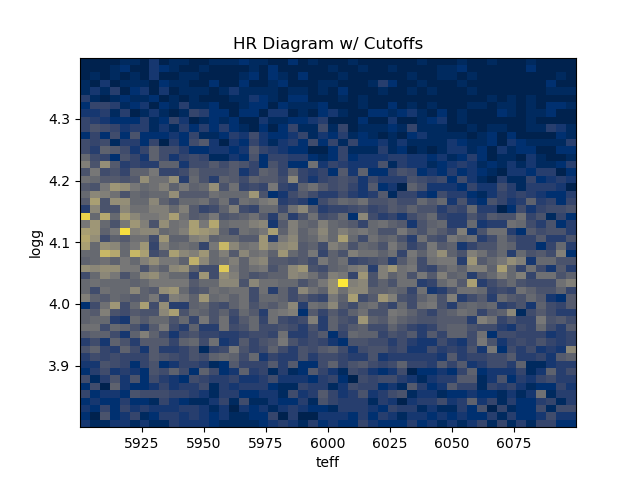

In [108]:
# Define the criteria for filtering
teff_min = 5900
teff_max = 6100
logg_target = 4.1
logg_tolerance = 0.3
feh_target = 0
feh_tolerance = 1
SNR_limit = 10
teff_unc_limit = 50
logg_unc_limit = 0.5

# Filter the data based on the criteria
teff_cutoff = tbl[
    (teff > teff_min) & 
    (teff < teff_max) & 
    (logg > logg_target - logg_tolerance) & 
    (logg < logg_target + logg_tolerance) & 
    (fe_h > feh_target - feh_tolerance) & 
    (fe_h < feh_target + feh_tolerance) & (SNR>SNR_limit) & 
    (teff_uncertainity>0) &  (teff_uncertainity<teff_unc_limit)&
    (logg_uncertainity>0) &  (logg_uncertainity<logg_unc_limit)

]

# Plot the filtered data
plt.figure()
plt.hist2d(teff_cutoff['TEFF_ADOP'], teff_cutoff['LOGG_ADOP'],bins=50,cmap='cividis')
plt.xlabel('teff')
plt.ylabel('logg')
plt.title('HR Diagram w/ Cutoffs')
plt.show()



In [109]:
len(teff_cutoff['TEFF_ADOP'])

13444

In [110]:
from astroquery.sdss import SDSS
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt

# Assuming tbl is a DataFrame and contains columns 'PLATE', 'MJD', and 'FIBER'
# Replace these with the appropriate index if necessary

# Retrieve the spectrum from SDSS
plate = teff_cutoff['PLATE'][0]
mjd = teff_cutoff['MJD'][0]
fiber = teff_cutoff['FIBER'][0]

# Retrieve the spectrum and get the HDUList object
spec_list = SDSS.get_spectra(plate=plate, mjd=mjd, fiberID=fiber)
spec = spec_list[0]  # Extract the HDUList object from the list

# Save the spectrum to a FITS file
spec.writeto('MySpectrum.fits', overwrite=True)

# Read the FITS file into a table
sp = Table.read('MySpectrum.fits')



In [111]:
df= pd.DataFrame(data={'SPECOBJID': teff_cutoff['SPECOBJID'],'RA': teff_cutoff['RA'],'DEC':teff_cutoff['DEC']})
df.to_csv('SDSS_xMatch.csv')

In [112]:
sp
#ivar - inverse variance on flux (bad values are ivar = 0 THUS in algorithm, make sure that ivar != 0 in sources)
#wdisp - wavelength dispersion 

#1/ sqrt(ivar) = error where ivar is error on flux 
#make plot of spectra with error bars 

#plotting residuals/ error THUS you are accounting for error  - error weighted residual
#(data- model )/ error

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
82.52027,3.5786,0.0130982585,0,201326592,1.2149258,8.3921175,7.6425004
101.48538,3.5787,0.0,0,201326592,1.2146591,8.124228,7.6337934
120.43941,3.5788,0.011435558,0,201326592,1.214395,8.00648,7.621132
105.08661,3.5789,0.012218446,0,201326592,1.2141278,7.722175,7.598038
111.59388,3.579,0.011686933,0,201326592,1.2138642,7.626317,7.632654
99.24291,3.5791,0.017873395,0,201326592,1.2136543,6.834788,7.4882073
...,...,...,...,...,...,...,...
48.261887,3.9626,0.24568833,65536,65536,0.74996275,4.1001472,48.739613
47.620155,3.9627,0.2311632,65536,65536,0.74993217,4.273633,48.280266


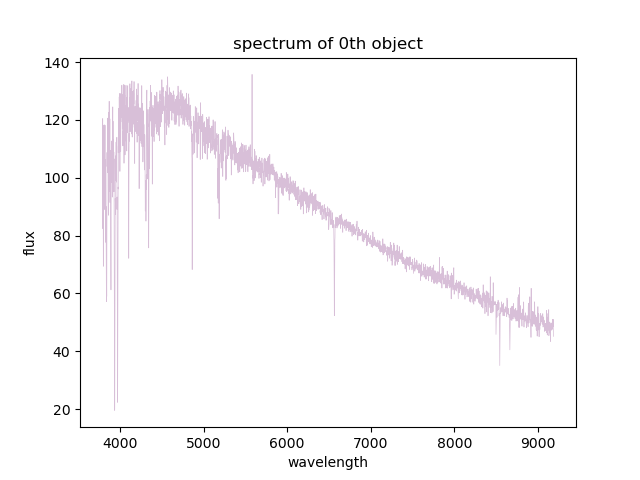

In [113]:
plt.figure()
plt.plot((10**sp['loglam']),sp['flux'],c='thistle',lw=.5)
#plt.plot((10**sp['loglam']),sp['model'],c='blue',lw=.5)
#plt.plot((10**sp['loglam']),sp['sky'],c='red',lw=.5)

plt.title('spectrum of 0th object')
plt.xlabel('wavelength')
plt.ylabel('flux')

plt.show()

high signal to noise criteria:
- smooth spectra
- SNR (avg signal to noise per wavelength bad) > 10 

task: make CMD diagram

In [114]:
gaia_merge_sdss = pd.read_csv('GAIA + SDSS MERGE.csv')
bp_rp = gaia_merge_sdss['bp_rp']
parallax = gaia_merge_sdss['parallax']
absG = gaia_merge_sdss['phot_g_mean_mag'] - (5 * np.log10(1000/parallax)) + 5

/opt/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [115]:
print(gaia_merge_sdss.columns)

Index(['angDist', 'col1', 'SPECOBJID', 'RA', 'DEC', 'ra_epoch2000',
       'dec_epoch2000', 'errHalfMaj', 'errHalfMin', 'errPosAng', 'source_id',
       'ra', 'ra_error', 'dec', 'dec_error', 'parallax', 'parallax_error',
       'parallax_over_error', 'pm', 'pmra', 'pmra_error', 'pmdec',
       'pmdec_error', 'astrometric_n_good_obs_al', 'astrometric_gof_al',
       'astrometric_chi2_al', 'astrometric_excess_noise',
       'astrometric_excess_noise_sig', 'astrometric_params_solved',
       'pseudocolour', 'pseudocolour_error', 'visibility_periods_used', 'ruwe',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_mag',
       'phot_bp_rp_excess_factor', 'bp_rp', 'dr2_radial_velocity',
       'dr2_radial_velocity_error', 'dr2_rv_nb_transits',
       'dr2_rv_template_teff', 'dr2_rv_template_logg', 'panstarrs1',
       'sdssdr13', 'sky

In [116]:
gaia_merge_sdss

,angDist,col1,SPECOBJID,RA,DEC,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,...,phot_g_mean_mag_error,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr
0,0.062677,0,b' 299527610126329856',145.83254,-1.002709,145.832538,-1.002726,0.001077,0.000577,131.19,...,0.002780,0.004238,0.004739,16.233246,0.002780,6048.51,-0.010,0.8950,0.8314,-0.5507
1,0.130626,1,b' 299552349137954816',145.67423,-0.380811,145.674220,-0.380776,0.000843,0.000516,127.18,...,0.002779,0.003793,0.004306,16.147947,0.002779,6542.86,0.003,0.7402,0.6544,-0.4411
2,0.062677,2,b' 299525136694929408',145.83254,-1.002709,145.832538,-1.002726,0.001077,0.000577,131.19,...,0.002780,0.004238,0.004739,16.233246,0.002780,6048.51,-0.010,0.8950,0.8314,-0.5507
3,0.130626,3,b' 299553723997251584',145.67423,-0.380811,145.674220,-0.380776,0.000843,0.000516,127.18,...,0.002779,0.003793,0.004306,16.147947,0.002779,6542.86,0.003,0.7402,0.6544,-0.4411
4,0.070802,4,b' 299584510322829312',145.29280,0.376335,145.292820,0.376334,0.002361,0.001391,138.36,...,0.002894,0.012472,0.009831,17.698560,0.002894,1568.64,0.003,1.8821,1.9920,-0.4820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13833,0.078640,13439,b' 3918272222292189184',252.04863,32.053180,252.048655,32.053174,0.000569,0.000450,17.97,...,0.002778,0.003972,0.004419,15.868268,0.002778,8465.24,-0.005,0.4625,0.5585,0.1375
13834,0.030149,13440,b' 3918273046925910016',252.17775,31.695640,252.177753,31.695648,0.000842,0.000674,19.54,...,0.002806,0.004584,0.005322,16.665524,0.002806,4061.97,-0.014,0.6945,0.8253,0.1408
13835,0.046828,13441,b' 3918282942530560000',252.65018,31.847871,252.650195,31.847874,0.000691,0.000520,32.01,...,0.002794,0.005104,0.004353,16.181017,0.002794,6346.59,0.002,0.5732,0.6477,0.2514
13836,0.136406,13442,b' 3918288714966605824',252.16199,32.624862,252.162004,32.624826,0.000598,0.000488,25.44,...,0.002794,0.004439,0.004404,16.045800,0.002794,7188.32,0.024,0.5105,0.5796,0.1566


In [117]:
string_value = gaia_merge_sdss['SPECOBJID'][0]

# Remove 'b' prefix and spaces, and get the number part
number_part = string_value.strip().lstrip('b').replace(' ', '')

# Remove single quotes around the number
number_part = number_part.strip("'")

# Convert the number part to an integer
number = int(number_part)

print(number)

299527610126329856


In [118]:
#my version of cleaning up SPECOBJID to not have the 'b' 
#is it a byte or str?
number_n = []
for x in gaia_merge_sdss['SPECOBJID']:
    number_part = x.strip().lstrip('b').replace(' ', '')
    number_part = number_part.strip("'")
    number = int(number_part)
    number_n.append(number)

In [119]:
# Assuming gaia_merge_sdss is already loaded as an Astropy Table
# For example, if you read it from a file:
# gaia_merge_sdss = Table.read('gaia_merge_sdss.fits', format='fits')

# Create an empty list to store cleaned SPECOBJID values
number_n = []

# Loop through each value in the SPECOBJID column, clean it, and append to the list
for x in gaia_merge_sdss['SPECOBJID']:
    number_part = x.strip().lstrip('b').replace(' ', '')
    number_part = number_part.strip("'")
    number = int(number_part)
    number_n.append(number)

# Add the cleaned SPECOBJID values as a new column in the table
gaia_merge_sdss['Cleaned_SPECOBJID'] = number_n

# Print the table to verify the changes
print(gaia_merge_sdss)


        angDist   col1                  SPECOBJID         RA        DEC  \
0      0.062677      0  b'    299527610126329856'  145.83254  -1.002709   
1      0.130626      1  b'    299552349137954816'  145.67423  -0.380811   
2      0.062677      2  b'    299525136694929408'  145.83254  -1.002709   
3      0.130626      3  b'    299553723997251584'  145.67423  -0.380811   
4      0.070802      4  b'    299584510322829312'  145.29280   0.376335   
...         ...    ...                        ...        ...        ...   
13833  0.078640  13439  b'   3918272222292189184'  252.04863  32.053180   
13834  0.030149  13440  b'   3918273046925910016'  252.17775  31.695640   
13835  0.046828  13441  b'   3918282942530560000'  252.65018  31.847871   
13836  0.136406  13442  b'   3918288714966605824'  252.16199  32.624862   
13837  0.077664  13443  b'   3918305207641022464'  253.21730  31.325416   

       ra_epoch2000  dec_epoch2000  errHalfMaj  errHalfMin  errPosAng  ...  \
0        145.832538  

In [120]:
gaia_merge_sdss

,angDist,col1,SPECOBJID,RA,DEC,ra_epoch2000,dec_epoch2000,errHalfMaj,errHalfMin,errPosAng,...,phot_bp_mean_mag_error,phot_rp_mean_mag_error,phot_g_mean_mag_corrected,phot_g_mean_mag_error_corrected,phot_g_mean_flux_corrected,phot_bp_rp_excess_factor_corrected,ra_epoch2000_error,dec_epoch2000_error,ra_dec_epoch2000_corr,Cleaned_SPECOBJID
0,0.062677,0,b' 299527610126329856',145.83254,-1.002709,145.832538,-1.002726,0.001077,0.000577,131.19,...,0.004238,0.004739,16.233246,0.002780,6048.51,-0.010,0.8950,0.8314,-0.5507,299527610126329856
1,0.130626,1,b' 299552349137954816',145.67423,-0.380811,145.674220,-0.380776,0.000843,0.000516,127.18,...,0.003793,0.004306,16.147947,0.002779,6542.86,0.003,0.7402,0.6544,-0.4411,299552349137954816
2,0.062677,2,b' 299525136694929408',145.83254,-1.002709,145.832538,-1.002726,0.001077,0.000577,131.19,...,0.004238,0.004739,16.233246,0.002780,6048.51,-0.010,0.8950,0.8314,-0.5507,299525136694929408
3,0.130626,3,b' 299553723997251584',145.67423,-0.380811,145.674220,-0.380776,0.000843,0.000516,127.18,...,0.003793,0.004306,16.147947,0.002779,6542.86,0.003,0.7402,0.6544,-0.4411,299553723997251584
4,0.070802,4,b' 299584510322829312',145.29280,0.376335,145.292820,0.376334,0.002361,0.001391,138.36,...,0.012472,0.009831,17.698560,0.002894,1568.64,0.003,1.8821,1.9920,-0.4820,299584510322829312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13833,0.078640,13439,b' 3918272222292189184',252.04863,32.053180,252.048655,32.053174,0.000569,0.000450,17.97,...,0.003972,0.004419,15.868268,0.002778,8465.24,-0.005,0.4625,0.5585,0.1375,3918272222292189184
13834,0.030149,13440,b' 3918273046925910016',252.17775,31.695640,252.177753,31.695648,0.000842,0.000674,19.54,...,0.004584,0.005322,16.665524,0.002806,4061.97,-0.014,0.6945,0.8253,0.1408,3918273046925910016
13835,0.046828,13441,b' 3918282942530560000',252.65018,31.847871,252.650195,31.847874,0.000691,0.000520,32.01,...,0.005104,0.004353,16.181017,0.002794,6346.59,0.002,0.5732,0.6477,0.2514,3918282942530560000
13836,0.136406,13442,b' 3918288714966605824',252.16199,32.624862,252.162004,32.624826,0.000598,0.000488,25.44,...,0.004439,0.004404,16.045800,0.002794,7188.32,0.024,0.5105,0.5796,0.1566,3918288714966605824


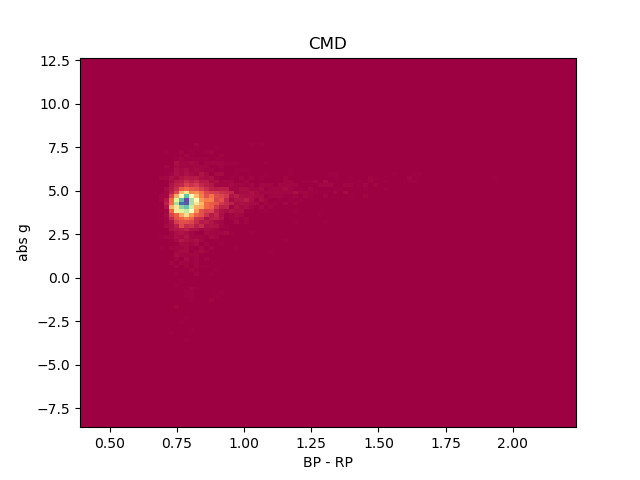

In [121]:
okstars = np.isfinite(bp_rp) & np.isfinite(absG)

plt.figure()
plt.hist2d(bp_rp[okstars], absG[okstars], bins=100,cmap='Spectral')

#plt.hist2d(np.isfinite(bp_rp),np.isfinite(absG),bins=100,cmap='Spectral')
plt.xlabel('BP - RP')
plt.ylabel('abs g')
plt.title('CMD')
plt.show()

06/11

__steps__
- draw box around range of high density 
- median color (x-axis) and median abs g (y-axis) so basically find centroid 
    - in x axis, find +/- 0.5 and y-axis, within 0.5 (from median point)
    - get object IDs of all the sources that pass the cut off

goal 1
- do cut with medians
    - create boolean:
    stars_to_consider = bp_rp[okstars] between +/- 0.5 of median AND absG[okstars] between +/- 0.5 of median
    print(objID of stars with mask stars_to_consider )
 
goal 2
- go back to SDSS table to find fiber, MJD, plate
    - SSPP original (tbl) + cross match new cut obJ IDs and get new merged table 

goal 3:
- pull 10 spectra that pass final cut

goal 4:
- inject gaussian spike (code eq of guassian and plot it on the spectra)




In [122]:
print('color median: ' , np.median(bp_rp[okstars]))
print('abs g: ' , np.median(absG[okstars]))
median_color = np.median(bp_rp[okstars])
median_absg = np.median(absG[okstars])
tolerance = 0.5
stars_to_consider = ((bp_rp[okstars] > (median_color- tolerance) ) &
                    (bp_rp[okstars] < (median_color+ tolerance) )&
                    (absG[okstars] < (median_absg+ tolerance) ) &
                    (absG[okstars] > (median_absg- tolerance) ) )

print(len(bp_rp[okstars] ))
print(len(bp_rp[okstars][stars_to_consider]))

color median:  0.796414
abs g:  4.301550506152418
13023
7801


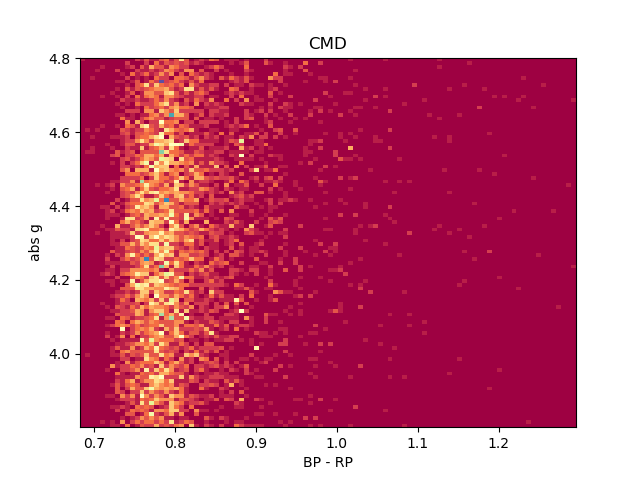

In [123]:
okstars = np.isfinite(bp_rp) & np.isfinite(absG)

plt.figure()
plt.hist2d(bp_rp[okstars][stars_to_consider], absG[okstars][stars_to_consider], bins=100,cmap='Spectral')

#plt.hist2d(np.isfinite(bp_rp),np.isfinite(absG),bins=100,cmap='Spectral')
plt.xlabel('BP - RP')
plt.ylabel('abs g')
plt.title('CMD')
plt.show()

In [124]:
cut_IDs_after_final_cut = (gaia_merge_sdss['Cleaned_SPECOBJID'][okstars][stars_to_consider])
df= pd.DataFrame(data={'CLEAN_SPECOBJID': cut_IDs_after_final_cut,'RA': gaia_merge_sdss['RA'][okstars][stars_to_consider],'DEC':gaia_merge_sdss['DEC'][okstars][stars_to_consider]})
df.to_csv('final_cut.csv')


In [125]:
import pandas as pd
from astropy.table import Table

# Load the CSV file into a pandas DataFrame
cut_IDs_after_final_cut_df = pd.read_csv('final_cut.csv')
# Convert the pandas DataFrame to an astropy Table
cut_IDs_after_final_cut = Table.from_pandas(cut_IDs_after_final_cut_df)
# Filter the astropy Table
#cut_out_table = cut_IDs_after_final_cut[cut_IDs_after_final_cut["SPECOBJID"] > 0]


In [126]:
cut_IDs_after_final_cut

Unnamed: 0,CLEAN_SPECOBJID,RA,DEC
int64,int64,float64,float64
0,299527610126329856,145.83254,-1.0027092
1,299552349137954816,145.67423,-0.38081052
2,299525136694929408,145.83254,-1.0027092
3,299553723997251584,145.67423,-0.38081052
4,299584510322829312,145.2928,0.37633508
7,300678524023367680,147.65636,-0.54811511
...,...,...,...
13826,3918156498693365760,251.91738,30.6201
13828,3918195531356151808,250.78558,31.435328


In [127]:
from astropy.table import join
SSPP = 'ssppOut-dr9.fits'
fits_file = fits.open(SSPP)
sspp_main_tbl = Table.read(SSPP, format='fits')


In [128]:
sspp_main_tbl

SPECOBJID,PLATEID,BESTOBJID,FLUXOBJID,TARGETOBJID,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,PLUG_RA,PLUG_DEC,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,FIRSTRELEASE,PROGRAMNAME,CHUNK,PLATERUN,RUNSSPP,RUN1D,RUN2D,MJD,PLATE,FIBER,PRIM_TARGET,SPECTYPE_HAMMER,SPECTYPE_SUBCLASS,FLAG,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,TEFF_HA24,TEFF_HD24,TEFF_TK,TEFF_TG,TEFF_TI,TEFF_NGS1,TEFF_ANNSR,TEFF_ANNRR,TEFF_WBG,TEFF_K24,TEFF_KI13,TEFF_HA24_IND,TEFF_HD24_IND,TEFF_TK_IND,TEFF_TG_IND,TEFF_TI_IND,TEFF_NGS1_IND,TEFF_ANNSR_IND,TEFF_ANNRR_IND,TEFF_WBG_IND,TEFF_K24_IND,TEFF_KI13_IND,TEFF_HA24_UNC,TEFF_HD24_UNC,TEFF_TK_UNC,TEFF_TG_UNC,TEFF_TI_UNC,TEFF_NGS1_UNC,TEFF_ANNSR_UNC,TEFF_ANNRR_UNC,TEFF_WBG_UNC,TEFF_K24_UNC,TEFF_KI13_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,LOGG_NGS2,LOGG_NGS1,LOGG_ANNSR,LOGG_ANNRR,LOGG_CAI1,LOGG_CAI2,LOGG_MGH,LOGG_WBG,LOGG_K24,LOGG_KI13,LOGG_NGS2_IND,LOGG_NGS1_IND,LOGG_ANNSR_IND,LOGG_ANNRR_IND,LOGG_CAI1_IND,LOGG_CAI2_IND,LOGG_MGH_IND,LOGG_WBG_IND,LOGG_K24_IND,LOGG_KI13_IND,LOGG_NGS2_UNC,LOGG_NGS1_UNC,LOGG_ANNSR_UNC,LOGG_ANNRR_UNC,LOGG_CAI1_UNC,LOGG_CAI2_UNC,LOGG_MGH_UNC,LOGG_WBG_UNC,LOGG_K24_UNC,LOGG_KI13_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,FEH_NGS2,FEH_NGS1,FEH_ANNSR,FEH_ANNRR,FEH_CAIIK1,FEH_CAIIK2,FEH_CAIIK3,FEH_ACF,FEH_CAIIT,FEH_WBG,FEH_K24,FEH_KI13,FEH_NGS2_IND,FEH_NGS1_IND,FEH_ANNSR_IND,FEH_ANNRR_IND,FEH_CAIIK1_IND,FEH_CAIIK2_IND,FEH_CAIIK3_IND,FEH_ACF_IND,FEH_CAIIT_IND,FEH_WBG_IND,FEH_K24_IND,FEH_KI13_IND,FEH_NGS2_UNC,FEH_NGS1_UNC,FEH_ANNSR_UNC,FEH_ANNRR_UNC,FEH_CAIIK1_UNC,FEH_CAIIK2_UNC,FEH_CAIIK3_UNC,FEH_ACF_UNC,FEH_CAIIT_UNC,FEH_WBG_UNC,FEH_K24_UNC,FEH_KI13_UNC,AFE,AFE_IND,AFE_UNC,DIST_DWARF,DIST_TO,DIST_GIANT,DIST_AGB,DIST_FHB,DIST_AP,DIST_Z,RV_FLAG,RV_ADOP,RV_ADOP_UNC,RV_CAL,RV_CAL_UNC,RV_BS,RV_BS_UNC,RV_ELODIE,RV_ELODIE_UNC,RV_GSR,RV_GSR_UNC,V_MAG,BV,BV_BALMER,GR_PREDICT,GR_HA24,GR_HD24,GR_HP,G_MAG,UG,GR,RI,IZ,U_MAG_UNC,G_MAG_UNC,R_MAG_UNC,I_MAG_UNC,Z_MAG_UNC,EBV,SNR,QA,CC_CAHK,CC_MGH,RA,DEC,L,B,TEFF_SPEC,TEFF_SPEC_N,TEFF_SPEC_UNC,LOGG_SPEC,LOGG_SPEC_N,LOGG_SPEC_UNC,FEH_SPEC,FEH_SPEC_N,FEH_SPEC_UNC,TEFF_COL,TEFF_COL_UNC,FEH_TFIX_NGS2,FEH_TFIX_NGS1,LOGG_TFIX_NGS2,LOGG_TFIX_NGS1,FEH_TFIX_NGS2_UNC,FEH_TFIX_NGS1_UNC,LOGG_TFIX_NGS2_UNC,LOGG_TFIX_NGS1_UNC,FEH_TFIX_CAIIK1,FEH_TFIX_CAIIK1_UNC,ACF1,ACF1_SNR,ACF2,ACF2_SNR,INSPECT,ELODIERVFINAL,ELODIERVFINALERR,ZWARNING,SURVEY,PRIMTARGET,SECTARGET,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,L_CLASS,DIST_ADOP,MP_FLAG,TEFF_IRFM,TEFF_IRFM_IND,TEFF_IRFM_UNC,LOGG_NGS1_IRFM,LOGG_NGS1_IRFM_IND,LOGG_NGS1_IRFM_UNC,FEH_NGS1_IRFM,FEH_NGS1_IRFM_IND,FEH_NGS1_IRFM_UNC,LOGG_CAI1_IRFM,LOGG_CAI1_IRFM_IND,LOGG_CAI1_IRFM_UNC,FEH_CAIIK1_IRFM,FEH_CAIIK1_IRFM_IND,FEH_CAIIK1_IRFM_UNC
bytes22,bytes19,bytes19,bytes19,bytes22,int32,int32,int32,int32,int32,float64,float64,int32,int32,int64,int64,bytes3,bytes23,bytes16,bytes16,bytes3,bytes1,bytes3,int32,int16,int16,bytes13,bytes4,bytes20,bytes5,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

In [129]:
sspp_main_tbl['SPECOBJID'] = sspp_main_tbl['SPECOBJID'].astype(str)

# Remove any non-numeric characters and convert to integers
sspp_main_tbl['SPECOBJID'] = [int(x.strip().strip("'")) for x in sspp_main_tbl['SPECOBJID']]

# Print the table to verify the changes
print(sspp_main_tbl['SPECOBJID'])

     SPECOBJID     
-------------------
 299489676975171584
 299489951853078528
 299490226730985472
 299490501608892416
 299490776486799360
 299491051364706304
 299491326242613248
                ...
3918306032274743296
3918306307152650240
3918306582030557184
3918306856908464128
3918307131786371072
3918307406664278016
3918307681542184960
Length = 1843200 rows


In [130]:
cut_out_table_cross_match_sdss = join(sspp_main_tbl, cut_IDs_after_final_cut, keys_left='SPECOBJID', keys_right='CLEAN_SPECOBJID')


In [131]:
cut_out_table_cross_match_sdss

SPECOBJID,PLATEID,BESTOBJID,FLUXOBJID,TARGETOBJID,SPECPRIMARY,SPECLEGACY,SPECSEGUE,SPECSEGUE1,SPECSEGUE2,PLUG_RA,PLUG_DEC,LEGACY_TARGET1,LEGACY_TARGET2,SPECIAL_TARGET1,SPECIAL_TARGET2,FIRSTRELEASE,PROGRAMNAME,CHUNK,PLATERUN,RUNSSPP,RUN1D,RUN2D,MJD,PLATE,FIBER,PRIM_TARGET,SPECTYPE_HAMMER,SPECTYPE_SUBCLASS,FLAG,TEFF_ADOP,TEFF_ADOP_N,TEFF_ADOP_UNC,TEFF_HA24,TEFF_HD24,TEFF_TK,TEFF_TG,TEFF_TI,TEFF_NGS1,TEFF_ANNSR,TEFF_ANNRR,TEFF_WBG,TEFF_K24,TEFF_KI13,TEFF_HA24_IND,TEFF_HD24_IND,TEFF_TK_IND,TEFF_TG_IND,TEFF_TI_IND,TEFF_NGS1_IND,TEFF_ANNSR_IND,TEFF_ANNRR_IND,TEFF_WBG_IND,TEFF_K24_IND,TEFF_KI13_IND,TEFF_HA24_UNC,TEFF_HD24_UNC,TEFF_TK_UNC,TEFF_TG_UNC,TEFF_TI_UNC,TEFF_NGS1_UNC,TEFF_ANNSR_UNC,TEFF_ANNRR_UNC,TEFF_WBG_UNC,TEFF_K24_UNC,TEFF_KI13_UNC,LOGG_ADOP,LOGG_ADOP_N,LOGG_ADOP_UNC,LOGG_NGS2,LOGG_NGS1,LOGG_ANNSR,LOGG_ANNRR,LOGG_CAI1,LOGG_CAI2,LOGG_MGH,LOGG_WBG,LOGG_K24,LOGG_KI13,LOGG_NGS2_IND,LOGG_NGS1_IND,LOGG_ANNSR_IND,LOGG_ANNRR_IND,LOGG_CAI1_IND,LOGG_CAI2_IND,LOGG_MGH_IND,LOGG_WBG_IND,LOGG_K24_IND,LOGG_KI13_IND,LOGG_NGS2_UNC,LOGG_NGS1_UNC,LOGG_ANNSR_UNC,LOGG_ANNRR_UNC,LOGG_CAI1_UNC,LOGG_CAI2_UNC,LOGG_MGH_UNC,LOGG_WBG_UNC,LOGG_K24_UNC,LOGG_KI13_UNC,FEH_ADOP,FEH_ADOP_N,FEH_ADOP_UNC,FEH_NGS2,FEH_NGS1,FEH_ANNSR,FEH_ANNRR,FEH_CAIIK1,FEH_CAIIK2,FEH_CAIIK3,FEH_ACF,FEH_CAIIT,FEH_WBG,FEH_K24,FEH_KI13,FEH_NGS2_IND,FEH_NGS1_IND,FEH_ANNSR_IND,FEH_ANNRR_IND,FEH_CAIIK1_IND,FEH_CAIIK2_IND,FEH_CAIIK3_IND,FEH_ACF_IND,FEH_CAIIT_IND,FEH_WBG_IND,FEH_K24_IND,FEH_KI13_IND,FEH_NGS2_UNC,FEH_NGS1_UNC,FEH_ANNSR_UNC,FEH_ANNRR_UNC,FEH_CAIIK1_UNC,FEH_CAIIK2_UNC,FEH_CAIIK3_UNC,FEH_ACF_UNC,FEH_CAIIT_UNC,FEH_WBG_UNC,FEH_K24_UNC,FEH_KI13_UNC,AFE,AFE_IND,AFE_UNC,DIST_DWARF,DIST_TO,DIST_GIANT,DIST_AGB,DIST_FHB,DIST_AP,DIST_Z,RV_FLAG,RV_ADOP,RV_ADOP_UNC,RV_CAL,RV_CAL_UNC,RV_BS,RV_BS_UNC,RV_ELODIE,RV_ELODIE_UNC,RV_GSR,RV_GSR_UNC,V_MAG,BV,BV_BALMER,GR_PREDICT,GR_HA24,GR_HD24,GR_HP,G_MAG,UG,GR,RI,IZ,U_MAG_UNC,G_MAG_UNC,R_MAG_UNC,I_MAG_UNC,Z_MAG_UNC,EBV,SNR,QA,CC_CAHK,CC_MGH,RA_1,DEC_1,L,B,TEFF_SPEC,TEFF_SPEC_N,TEFF_SPEC_UNC,LOGG_SPEC,LOGG_SPEC_N,LOGG_SPEC_UNC,FEH_SPEC,FEH_SPEC_N,FEH_SPEC_UNC,TEFF_COL,TEFF_COL_UNC,FEH_TFIX_NGS2,FEH_TFIX_NGS1,LOGG_TFIX_NGS2,LOGG_TFIX_NGS1,FEH_TFIX_NGS2_UNC,FEH_TFIX_NGS1_UNC,LOGG_TFIX_NGS2_UNC,LOGG_TFIX_NGS1_UNC,FEH_TFIX_CAIIK1,FEH_TFIX_CAIIK1_UNC,ACF1,ACF1_SNR,ACF2,ACF2_SNR,INSPECT,ELODIERVFINAL,ELODIERVFINALERR,ZWARNING,SURVEY,PRIMTARGET,SECTARGET,SEGUE1_TARGET1,SEGUE1_TARGET2,SEGUE2_TARGET1,SEGUE2_TARGET2,L_CLASS,DIST_ADOP,MP_FLAG,TEFF_IRFM,TEFF_IRFM_IND,TEFF_IRFM_UNC,LOGG_NGS1_IRFM,LOGG_NGS1_IRFM_IND,LOGG_NGS1_IRFM_UNC,FEH_NGS1_IRFM,FEH_NGS1_IRFM_IND,FEH_NGS1_IRFM_UNC,LOGG_CAI1_IRFM,LOGG_CAI1_IRFM_IND,LOGG_CAI1_IRFM_UNC,FEH_CAIIK1_IRFM,FEH_CAIIK1_IRFM_IND,FEH_CAIIK1_IRFM_UNC,Unnamed: 0,CLEAN_SPECOBJID,RA_2,DEC_2
int64,bytes19,bytes19,bytes19,bytes22,int32,int32,int32,int32,int32,float64,float64,int32,int32,int64,int64,bytes3,bytes23,bytes16,bytes16,bytes3,bytes1,bytes3,int32,int16,int16,bytes13,bytes4,bytes20,bytes5,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,flo

In [132]:
''' 
%matplotlib inline
from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
colors = ['#EF798A','#F39199','#F7A9A8','#AC748F','#875A82','#613F75','#A381A3','#C4A2BA','#D5B3C6','#E5C3D1']

# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot each spectrum separately
for i in range(10):
    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
    spectrum = spec_list[0]

    plt.plot(10**spectrum[1].data['loglam'], spectrum[1].data['flux'],lw=0.5,alpha=0.2,label=cut_out_table_cross_match_sdss["SPECOBJID"][i],c=colors[i])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('spectra of first 10 objects')
plt.xlabel('Wavelength')
plt.ylabel('Flux')
plt.show()
'''

' \n%matplotlib inline\nfrom astroquery.sdss import SDSS\nfrom astropy.table import Table\nimport matplotlib.pyplot as plt\nplt.figure(figsize=(10, 6))\ncolors = [\'#EF798A\',\'#F39199\',\'#F7A9A8\',\'#AC748F\',\'#875A82\',\'#613F75\',\'#A381A3\',\'#C4A2BA\',\'#D5B3C6\',\'#E5C3D1\']\n\n# Retrieve the first 10 sources\' spectra from SDSS\nplate = cut_out_table_cross_match_sdss[\'PLATE\'][:10]\nmjd = cut_out_table_cross_match_sdss[\'MJD\'][:10]\nfiber = cut_out_table_cross_match_sdss[\'FIBER\'][:10]\n\n# Plot each spectrum separately\nfor i in range(10):\n    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])\n    spectrum = spec_list[0]\n\n    plt.plot(10**spectrum[1].data[\'loglam\'], spectrum[1].data[\'flux\'],lw=0.5,alpha=0.2,label=cut_out_table_cross_match_sdss["SPECOBJID"][i],c=colors[i])\nplt.legend(bbox_to_anchor=(1.05, 1), loc=\'upper left\')\nplt.title(\'spectra of first 10 objects\')\nplt.xlabel(\'Wavelength\')\nplt.ylabel(\'Flux\')\nplt.show()\n'

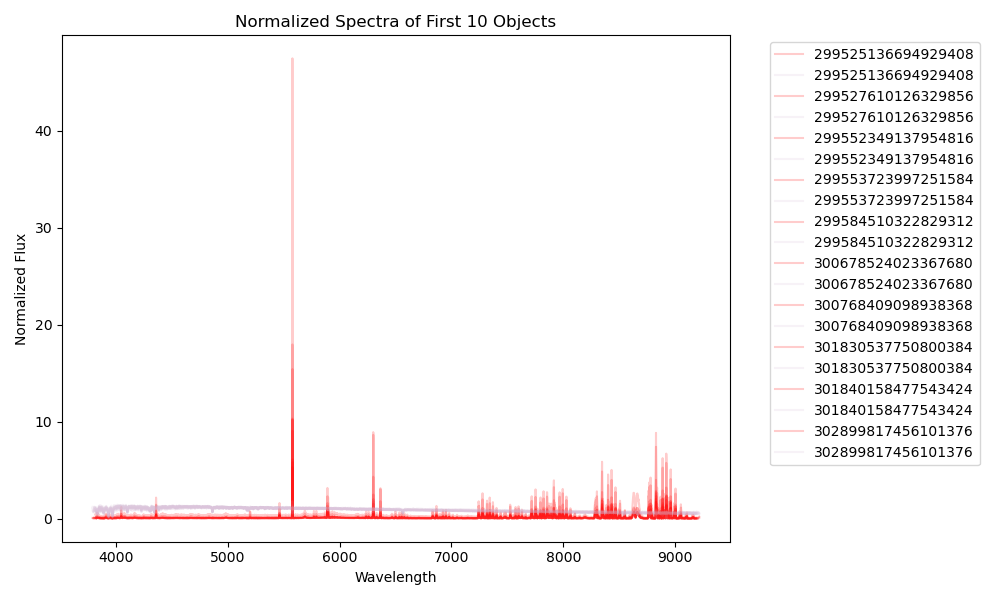

In [133]:
%matplotlib widget
from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
#colors = ['#EF798A','#F39199','#F7A9A8','#AC748F','#875A82','#613F75','#A381A3','#C4A2BA','#D5B3C6','#E5C3D1']
# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot all spectra on one plot
plt.figure(figsize=(10, 6))

for i in range(10):
    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
    spectrum = spec_list[0]
    
    # Extract wavelength and flux
    wavelength = 10**spectrum[1].data['loglam']
    flux = spectrum[1].data['flux']
    sky = spectrum[1].data['sky']

    
    # Normalize by median flux
    median_flux = np.median(flux)
    normalized_flux = flux / median_flux
    normalized_sky = sky/median_flux
    
    plt.plot(wavelength, normalized_sky, label=cut_out_table_cross_match_sdss["SPECOBJID"][i],alpha=0.2,c='red')
    plt.plot(wavelength, normalized_flux, label=cut_out_table_cross_match_sdss["SPECOBJID"][i],alpha=0.2,c='thistle')

plt.title('Normalized Spectra of First 10 Objects')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


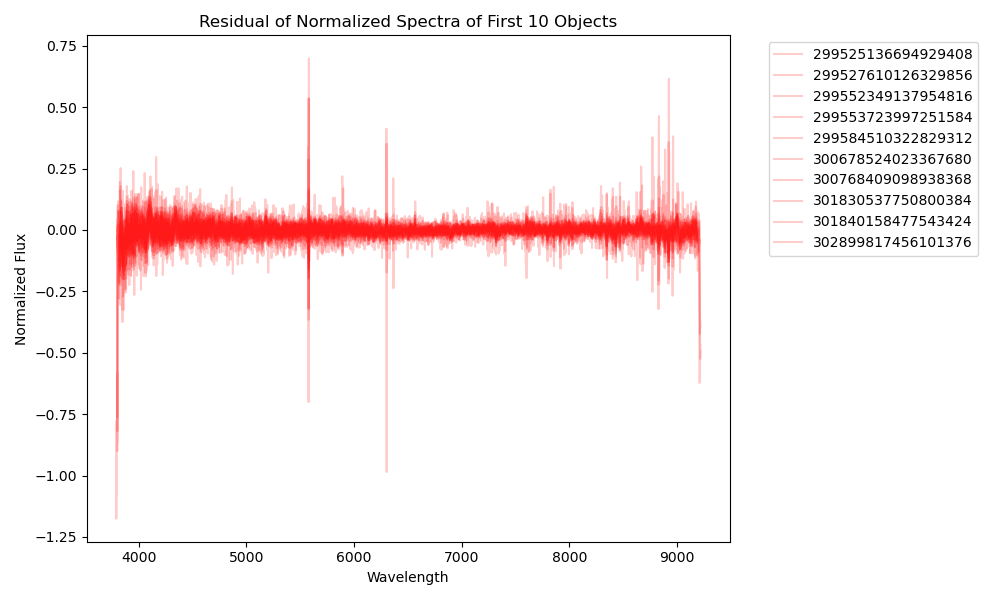

In [134]:
%matplotlib widget
from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
#colors = ['#EF798A','#F39199','#F7A9A8','#AC748F','#875A82','#613F75','#A381A3','#C4A2BA','#D5B3C6','#E5C3D1']
# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot all spectra on one plot
plt.figure(figsize=(10, 6))

for i in range(10):
    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
    spectrum = spec_list[0]
    
    # Extract wavelength and flux
    wavelength = 10**spectrum[1].data['loglam']
    model =  spectrum[1].data['model']
    flux = spectrum[1].data['flux']

    
    # Normalize by median flux
    median_flux = np.median(flux)
    normalized_flux = flux / median_flux
    normalized_model = model/median_flux
    
    plt.plot(wavelength, normalized_model - normalized_flux, label=cut_out_table_cross_match_sdss["SPECOBJID"][i],alpha=0.2,c='red')

plt.title('Residual of Normalized Spectra of First 10 Objects')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')

# Place legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#those emission features in residual plot indicate either anomalies or sky features


In [135]:
''' 
%matplotlib widget

from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt

# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot each spectrum separately
for i in range(10):
    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
    spectrum = spec_list[0]

    plt.figure()
    plt.plot(10**spectrum[1].data['loglam'], spectrum[1].data['flux'],c='thistle',lw=0.5)
    plt.title(f'SPECOBJID: {cut_out_table_cross_match_sdss["SPECOBJID"][i]}')
    plt.xlabel('Wavelength')
    plt.ylabel('Flux')
    plt.show()
'''

' \n%matplotlib widget\n\nfrom astroquery.sdss import SDSS\nfrom astropy.table import Table\nimport matplotlib.pyplot as plt\n\n# Retrieve the first 10 sources\' spectra from SDSS\nplate = cut_out_table_cross_match_sdss[\'PLATE\'][:10]\nmjd = cut_out_table_cross_match_sdss[\'MJD\'][:10]\nfiber = cut_out_table_cross_match_sdss[\'FIBER\'][:10]\n\n# Plot each spectrum separately\nfor i in range(10):\n    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])\n    spectrum = spec_list[0]\n\n    plt.figure()\n    plt.plot(10**spectrum[1].data[\'loglam\'], spectrum[1].data[\'flux\'],c=\'thistle\',lw=0.5)\n    plt.title(f\'SPECOBJID: {cut_out_table_cross_match_sdss["SPECOBJID"][i]}\')\n    plt.xlabel(\'Wavelength\')\n    plt.ylabel(\'Flux\')\n    plt.show()\n'

In [136]:
#to save into PDF
from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot each spectrum separately with its ID as title and save to PDF
with PdfPages('spectra_plots.pdf') as pdf:
    for i in range(10):
        spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
        spectrum = spec_list[0]

        plt.figure()
        plt.plot(10**spectrum[1].data['loglam'], spectrum[1].data['flux'])
        plt.title(f'Spectrum of Object {cut_out_table_cross_match_sdss["SPECOBJID"][i]}')
        plt.xlabel('Wavelength')
        plt.ylabel('Flux')
        pdf.savefig()  # Save the current figure to the PDF
        plt.close()  # Close the current figure to free memory


In [137]:
def gauss(x, H, A, x0, sigma): 
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))

In [138]:
g_flux = gauss(10**spectrum[1].data['loglam'], 0, 0.25, 6700, 2)
#change x0 and A variables to compelte entire residual axis 

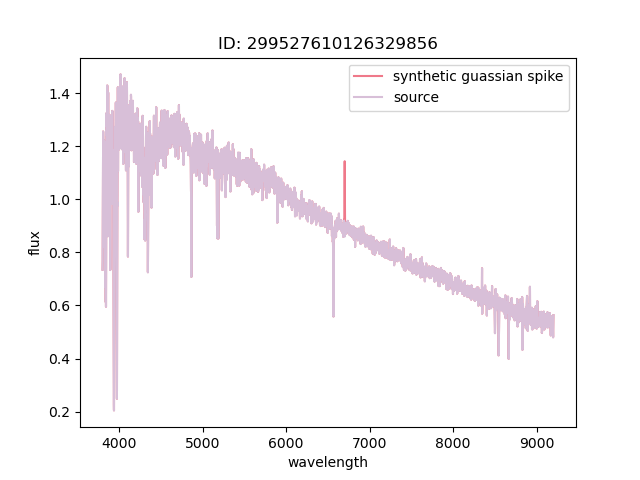

3844

In [139]:
plt.figure()
plt.plot(10**spectrum[1].data['loglam'],g_flux+normalized_flux,c='#EF798A',label='synthetic guassian spike')
plt.plot(10**spectrum[1].data['loglam'],normalized_flux,c='thistle',label='source') #star with synthetic guassian spike embedded 
plt.title(f'ID: {cut_out_table_cross_match_sdss["SPECOBJID"][1]}')
plt.xlabel('wavelength')
plt.ylabel('flux')
plt.legend()
plt.show()
len(10**spectrum[1].data['loglam'])

wed goal:
- gaussian spike on spectra
- make guassian of (sigma = 1 ang), amplitude = 10%, H (baseline offset) = 0, x0 = 6700 ang
- x is the wavelength array 

 plot sky for all 10 spectra 
 
 plot diff between flux_data and flux_model of 10 spectra (plot 10 residuals overlayed + normalized)
    
 --------------------------------------------------------------------------------------------
 how do we simulate a real laser line (MaNGA line spread fucntion)
 
 - MaNGA was a survey that ran on SDSS (bundle/clump of fibers, same volume of data but recieve low-resolution spectra) 
- line spread function (broadening/width) for spectrographs 
- laser should be 1 pixel in wavelength intrisically BUT when experiemnt put laser into telescope, spectra gave out a gaussian-like spread feature so it was not actually narrow 

 inject a bunch of lasers and see if it recovers them
 
- where is the model the first OR are the residuals great

anna paper:
- look for spikes in flat spectrum (look for significant features)
- recover spectra (if you inject a known signal, can you find it)
- what is a the fraction that the model laser recovers
    (how good are you at finding the data you hid) 
    
- how can you recover the spike in the spectra (if it was guassian/laser-like)
- what is the energy of the laser that would make a signal like that

friday
HW: //what is the MaNGA line spread function (do they give you gaussian parameters or you can code up a function)
- read documentation 


- download 7800 spectra on diff computer (test with 10-50)
- read spectrum - model (plot residual)
- from each residual, search for intense spikes // scipy peak find (to find emission features)
    - scipy peak_find (set thresholds): write function, that detects spike/peak in residual plot
    //what is the laser (what is the central wavelength, amplitude) we would have detected 
    //width of laser is always the same 
    - for each spectrum, inject gaussians 
- once peak is found, find amplitude, center, and width of peak

end goal: for each spectrum, inject 1000 mock emission lines (aka laser), and keep track of whether you recover it or not. if our recovery function works, then we can apply this to actual raw flux

- to recover gaussian, go through residual and see if there are any outliers (> 0.25 for ex) 
- run scipy peak find that will find peaks within residual amplitudes/max points 
- for any POSITIVE peaks that is finds, fit peak with guassian, find amplitude, central wavelength and width
    - if they are too broad (big peak but wide) eliminate since we know lasers are infintely narrow
    - if it negative, that means it is not a laser (since lasers should have emission features NOT absorption features)
    - IF there are too many anomoulous peaks, then the spectra is bad/too noisy (as aliens would likely only show one emission feature laser)

https://www.sdss4.org/dr17/manga/manga-data/data-model/

june 17th
- run notebook on ssh cluster 
- outline what published research paper would look like (what figures and measures do we have to make)
- read in LSF CSV function which has values in x axis of (-6,6)
- plot CSV in pixel units (normalized from 0 to 1 in flux) 
- fit with gaussian (scipy curve fit to find sigma and amplitude, etc.)
- find sigma in pixel values 

goal: pixel to wavelength, because we are trying to get the synthetic guassian above to the correct width which is why we need LSF (to find correct sigma value) 

notes

- research note worst case, paper at best

- AAS poster :: (can only present ONE poster) 

- Penn State SETI Conference (posters & talks)

- Undergrad Symposium @ UT 

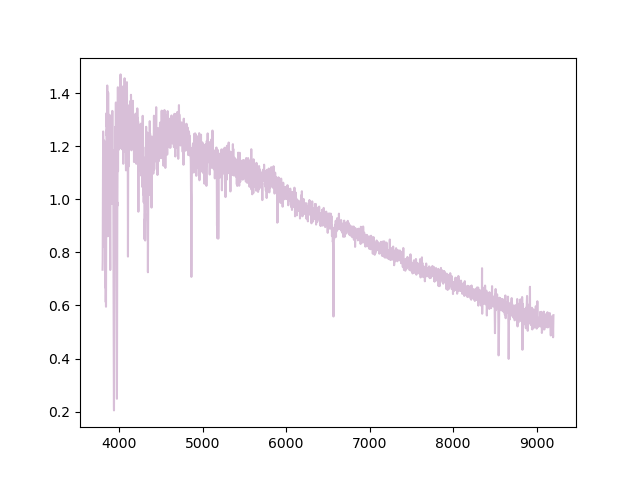

In [140]:
#pixel units - wavelength 
#3844 pixel
plt.figure() 
#plt.plot(normalized_flux,c='thistle',label='source') #pixel vs flux
plt.plot(10**spectrum[1].data['loglam'],normalized_flux,c='thistle',label='source') #pixel vs wavelength 

plt.show() #pixel units


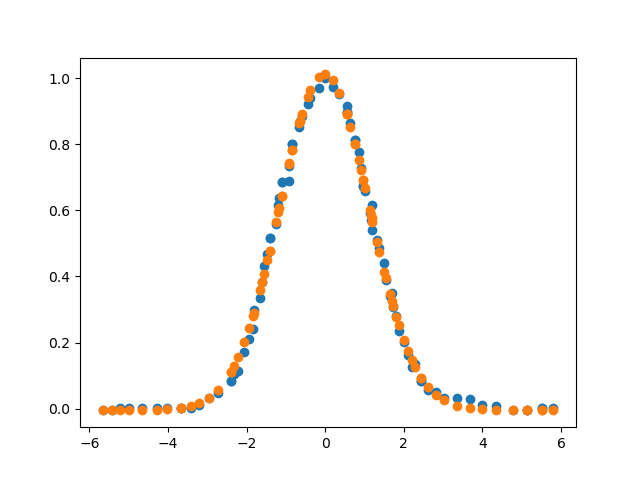

In [141]:
LSF_approx  = pd.read_csv("MaNGA_LSF_approx.csv")

from scipy.optimize import curve_fit
def func(x, H, A, x0, sigma): 
    return H + A * np.exp(-(x - x0) ** 2 / (2 * sigma ** 2))
xdata = LSF_approx['x']
ydata = LSF_approx[' y']
popt, pcov = curve_fit(func, xdata, ydata)
plt.figure()
plt.scatter(LSF_approx['x'],LSF_approx[' y'])
plt.scatter(xdata,func(xdata, popt[0], popt[1], popt[2], popt[3]))
plt.show()


In [142]:
popt
sigma = popt[3]

In [143]:
sigma

1.1401069260973762

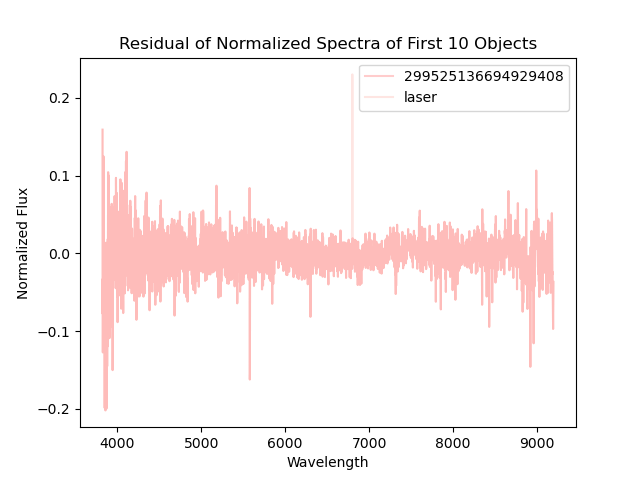

In [144]:
#attempt to inject and recover laser in 1 residual spectra
%matplotlib widget
from astroquery.sdss import SDSS
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
#colors = ['#EF798A','#F39199','#F7A9A8','#AC748F','#875A82','#613F75','#A381A3','#C4A2BA','#D5B3C6','#E5C3D1']
# Retrieve the first 10 sources' spectra from SDSS
plate = cut_out_table_cross_match_sdss['PLATE'][:10]
mjd = cut_out_table_cross_match_sdss['MJD'][:10]
fiber = cut_out_table_cross_match_sdss['FIBER'][:10]

# Plot all spectra on one plot
#plt.figure(figsize=(10, 6))
plt.figure()
for i in range(1):
    spec_list = SDSS.get_spectra(plate=plate[i], mjd=mjd[i], fiberID=fiber[i])
    spectrum = spec_list[0]
    
    # Extract wavelength and flux
    wavelength = 10**spectrum[1].data['loglam']
    model =  spectrum[1].data['model']
    flux = spectrum[1].data['flux']
    
    ivar = spectrum[1].data['ivar']
    error = 1/(np.sqrt(ivar))
    
    # Normalize by median flux
    median_flux = np.median(flux)
    normalized_flux = flux / median_flux
    normalized_model = model/median_flux
    
    pixels = np.arange(len(wavelength))
    residual_guassian = gauss(pixels, 0, 0.25, 2500, 1.1401069260973762)

    plt.plot(wavelength, normalized_model - normalized_flux, label=cut_out_table_cross_match_sdss["SPECOBJID"][i],alpha=0.2,c='red')
    plt.plot(wavelength, (normalized_model - normalized_flux)+residual_guassian, label='laser',alpha=0.2,c='salmon')

#change x0 and A variables to compelte entire residual axis 

plt.title('Residual of Normalized Spectra of First 10 Objects')
plt.xlabel('Wavelength')
plt.ylabel('Normalized Flux')

# Place legend outside the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend()
#plt.tight_layout()
plt.show()
#those emission features in residual plot indicate either anomalies or sky features

#plot of pixel versus wavelength to detemine x0 central wavelength or central pixel value 


In [145]:
sp
#ivar - inverse variance on flux (bad values are ivar = 0 THUS in algorithm, make sure that ivar != 0 in sources)
#wdisp - wavelength dispersion 

#1/ sqrt(ivar) = error where ivar is error on flux 
#make plot of spectra with error bars 

#plotting residuals/ error THUS you are accounting for error  - error weighted residual
#(data- model )/ error

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
82.52027,3.5786,0.0130982585,0,201326592,1.2149258,8.3921175,7.6425004
101.48538,3.5787,0.0,0,201326592,1.2146591,8.124228,7.6337934
120.43941,3.5788,0.011435558,0,201326592,1.214395,8.00648,7.621132
105.08661,3.5789,0.012218446,0,201326592,1.2141278,7.722175,7.598038
111.59388,3.579,0.011686933,0,201326592,1.2138642,7.626317,7.632654
99.24291,3.5791,0.017873395,0,201326592,1.2136543,6.834788,7.4882073
...,...,...,...,...,...,...,...
48.261887,3.9626,0.24568833,65536,65536,0.74996275,4.1001472,48.739613
47.620155,3.9627,0.2311632,65536,65536,0.74993217,4.273633,48.280266


In [146]:
ivar = spectrum[1].data['ivar']
for x in ivar:
    if x > 0:
        error = 1/(np.sqrt(ivar))

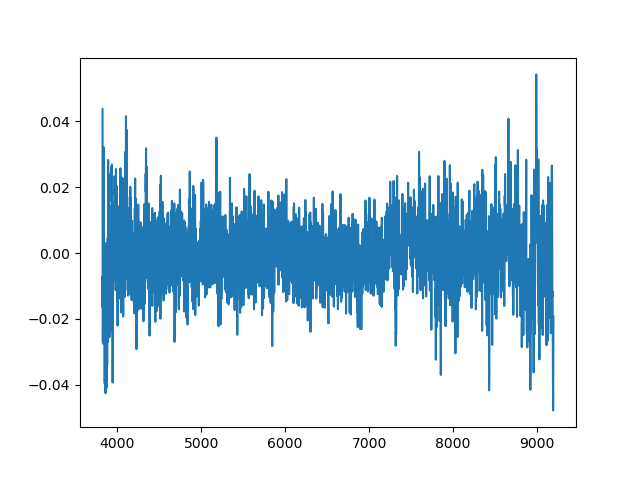

In [147]:
plt.figure()
#plt.plot(wavelength, flux,c='red')
#plt.errorbar(wavelength,error)
plt.plot(wavelength,((normalized_model - normalized_flux)/error) )
plt.show()

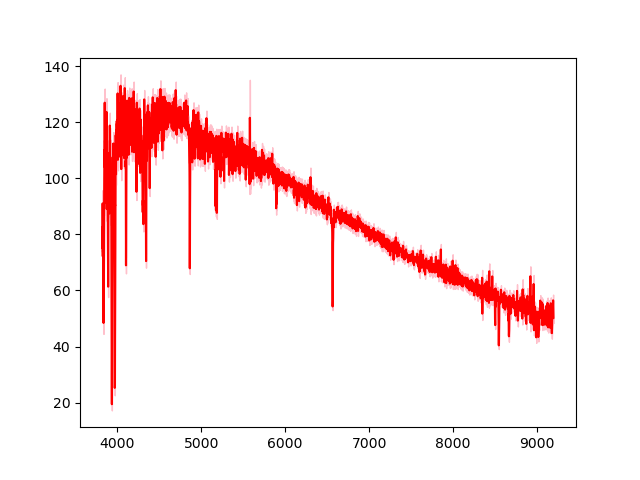

In [148]:
plt.figure()
plt.plot(wavelength, flux,c='red')
plt.fill_between(wavelength,flux,flux+error,color='pink')
plt.fill_between(wavelength,flux,flux-error,color='pink')

#plt.fill_between(wavelength,error,alpha=0.2)
plt.show()

In [149]:
def recovery:
    if (invar =! 0) & (normalized_flux > 0) & 
    

SyntaxError: invalid syntax (604119588.py, line 1)

In [ ]:
from each residual, search for intense spikes // scipy peak find (to find emission features)
    - scipy peak_find (set thresholds): write function, that detects spike/peak in residual plot
    //what is the laser (what is the central wavelength, amplitude) we would have detected 
    //width of laser is always the same 
    - for each spectrum, inject gaussians 
- once peak is found, find amplitude, center, and width of peak

end goal: for each spectrum, inject 1000 mock emission lines (aka laser), and keep track of whether you recover it or not. if our recovery function works, then we can apply this to actual raw flux

- to recover gaussian, go through residual and see if there are any outliers (> 0.25 for ex) 
- run scipy peak find that will find peaks within residual amplitudes/max points 
- for any POSITIVE peaks that is finds, fit peak with guassian, find amplitude, central wavelength and width
    - if they are too broad (big peak but wide) eliminate since we know lasers are infintely narrow
    - if it negative, that means it is not a laser (since lasers should have emission features NOT absorption features)
    - IF there are too many anomoulous peaks, then the spectra is bad/too noisy (as aliens would likely only show one emission feature laser)